In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt

PATH = "results_all.json"

with open(PATH, mode="r") as fr:
    results = json.load(fr)

/tmp/ipykernel_24713/2959997724.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
def get_avg_layer_metric(layer_num, metric, results):
    met2ind = { "precision":0, "recall":1, "f1_score":2 }

    avg_results_all = {}
    
    for ref_dataset_name, input_dataset_names in results.items():
        avg_results_all[ref_dataset_name] = {}
        for input_dataset_name, layer_scores in input_dataset_names.items():
            metric_results = [layer_score[str(layer_num)][met2ind[metric]] for layer_score in layer_scores]
            avg_results_all[ref_dataset_name][input_dataset_name] = sum(metric_results)/len(metric_results)

    return pd.DataFrame.from_dict(avg_results_all)

In [3]:
df = get_avg_layer_metric(14, "precision", results)

df
df.style.highlight_max(color = 'pink', axis = 1)

,atc,cv-id,cv-vi,maritime,nsc-room
atc,0.653510,0.588098,0.582817,0.638626,0.573826
cv-id,0.619125,0.643020,0.600963,0.603452,0.610461
cv-vi,0.649773,0.673589,0.674854,0.643254,0.618312
maritime,0.666863,0.630412,0.638594,0.687718,0.570316
nsc-room,0.615306,0.577854,0.569348,0.591975,0.624339


In [4]:
avg_all_prec_results = {}
for ref_dataset_name, _ in results.items():
    avg_prec_results_per_layer = []
    for layer in range(1, 25):
        prec_results = [layer_score[str(layer)][0] for layer_score in results[ref_dataset_name][ref_dataset_name]]
        avg_prec_results = sum(prec_results)/len(prec_results)
        avg_prec_results_per_layer.append(avg_prec_results)
    avg_all_prec_results[ref_dataset_name] = avg_prec_results_per_layer

In [5]:
df2 = pd.DataFrame.from_dict(avg_all_prec_results, orient="index")
df2.columns = range(1,25)

In [6]:
df2
df2.style.highlight_max(color = 'pink', axis = 1)

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
atc,0.879636,0.810463,0.758273,0.753715,0.725616,0.677462,0.691312,0.705915,0.692975,0.680478,0.689696,0.669529,0.653193,0.653510,0.655142,0.649767,0.655526,0.665389,0.679353,0.674920,0.682056,0.679008,0.677314,0.622049
cv-id,0.826631,0.747115,0.677822,0.665411,0.642259,0.600290,0.616004,0.643226,0.641580,0.631803,0.648013,0.637301,0.628951,0.643020,0.651283,0.657438,0.663286,0.683557,0.699688,0.699551,0.697416,0.641471,0.635110,0.543554
cv-vi,0.844288,0.776971,0.721629,0.709984,0.687742,0.656869,0.669387,0.688812,0.688788,0.678443,0.680639,0.668343,0.658192,0.674854,0.681020,0.684200,0.693305,0.704836,0.715873,0.721012,0.725296,0.680596,0.662457,0.583170
maritime,0.907970,0.856555,0.812165,0.799501,0.776366,0.732668,0.733575,0.742230,0.731478,0.717912,0.716328,0.694490,0.679888,0.687718,0.691913,0.687060,0.697116,0.699414,0.703870,0.691084,0.688839,0.668887,0.667896,0.641934
nsc-room,0.836800,0.761056,0.701261,0.690005,0.664148,0.618529,0.624776,0.638966,0.631612,0.620533,0.634528,0.620976,0.613002,0.624339,0.632740,0.638311,0.650008,0.657038,0.674582,0.658806,0.650998,0.587958,0.595473,0.495487


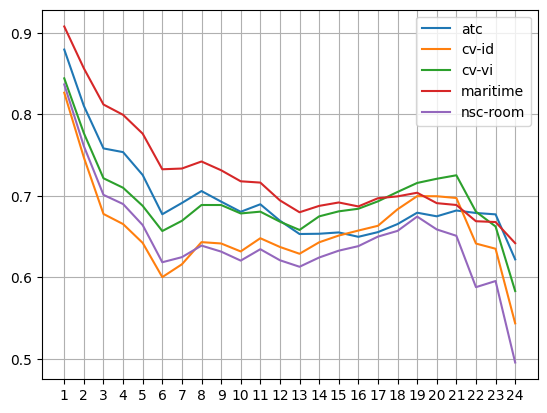

In [7]:
ax = df2.T.plot(grid=True)
ax.set_xticks(range(1,25))

plt.show()

In [8]:
df3 = get_avg_layer_metric(1, "precision", results)

df3
df3.style.highlight_max(color = 'pink', axis = 1)

,atc,cv-id,cv-vi,maritime,nsc-room
atc,0.879636,0.771268,0.761984,0.866305,0.780310
cv-id,0.788215,0.826631,0.826781,0.788522,0.843557
cv-vi,0.817359,0.845759,0.844288,0.809914,0.831908
maritime,0.900237,0.829113,0.827965,0.907970,0.817695
nsc-room,0.760271,0.787529,0.792882,0.754076,0.836800


In [9]:
df4 = get_avg_layer_metric(2, "precision", results)

df4
df4.style.highlight_max(color = 'pink', axis = 1)

,atc,cv-id,cv-vi,maritime,nsc-room
atc,0.810463,0.682667,0.677347,0.789769,0.682739
cv-id,0.707071,0.747115,0.748120,0.707442,0.766470
cv-vi,0.739983,0.777858,0.776971,0.734605,0.751639
maritime,0.838300,0.753911,0.759194,0.856555,0.731950
nsc-room,0.678747,0.704118,0.709477,0.672257,0.761056


### Recall

In [10]:
avg_all_recall_results = {}
for ref_dataset_name, _ in results.items():
    avg_recall_results_per_layer = []
    for layer in range(1, 25):
        recall_results = [layer_score[str(layer)][1] for layer_score in results[ref_dataset_name][ref_dataset_name]]
        avg_recall_results = sum(recall_results)/len(recall_results)
        avg_recall_results_per_layer.append(avg_recall_results)
    avg_all_recall_results[ref_dataset_name] = avg_recall_results_per_layer

In [11]:
df5 = pd.DataFrame.from_dict(avg_all_recall_results, orient="index")
df5.columns = range(1,25)

In [12]:
df5
df5.style.highlight_max(color = 'pink', axis = 1)

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
atc,0.853818,0.776036,0.718008,0.713493,0.680544,0.625343,0.641588,0.658283,0.645199,0.630885,0.644275,0.620511,0.599941,0.595244,0.598808,0.596610,0.603279,0.618564,0.633327,0.623085,0.624781,0.605365,0.605883,0.514281
cv-id,0.824545,0.749418,0.685421,0.673639,0.652181,0.616499,0.631456,0.660171,0.659809,0.646800,0.654452,0.641170,0.631857,0.646227,0.658861,0.668947,0.685638,0.701994,0.712571,0.709778,0.698296,0.647882,0.631611,0.544554
cv-vi,0.839735,0.770223,0.712854,0.702433,0.678964,0.649306,0.661368,0.685363,0.687555,0.675629,0.671126,0.654946,0.640834,0.654044,0.663764,0.671000,0.690057,0.698585,0.706806,0.709739,0.704374,0.652424,0.628370,0.537236
maritime,0.894001,0.832028,0.779057,0.766065,0.735471,0.680942,0.683648,0.695458,0.683751,0.668793,0.672847,0.646490,0.624438,0.626981,0.634568,0.632320,0.642796,0.654101,0.663342,0.647505,0.645367,0.635410,0.620976,0.558050
nsc-room,0.844021,0.768495,0.706579,0.692020,0.664766,0.617413,0.621573,0.634519,0.628134,0.617447,0.630042,0.617655,0.607696,0.615888,0.624415,0.629006,0.640162,0.649096,0.668254,0.654786,0.648904,0.584544,0.596889,0.494601


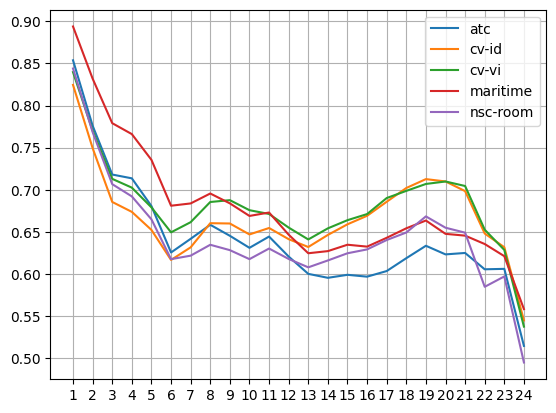

In [13]:
ax = df5.T.plot(grid=True)
ax.set_xticks(range(1,25))

plt.show()

In [14]:
df6 = get_avg_layer_metric(1, "recall", results)

df6
df6.style.highlight_max(color = 'pink', axis = 1)

,atc,cv-id,cv-vi,maritime,nsc-room
atc,0.853818,0.778525,0.797196,0.873526,0.756002
cv-id,0.763847,0.824545,0.850855,0.807362,0.826138
cv-vi,0.741208,0.814791,0.839735,0.786000,0.799978
maritime,0.839281,0.797975,0.823381,0.894001,0.770982
nsc-room,0.766137,0.797758,0.819740,0.783037,0.844021


In [15]:
avg_all_f1_results = {}
for ref_dataset_name, _ in results.items():
    avg_f1_results_per_layer = []
    for layer in range(1, 25):
        f1_results = [layer_score[str(layer)][2] for layer_score in results[ref_dataset_name][ref_dataset_name]]
        avg_f1_results = sum(f1_results)/len(f1_results)
        avg_f1_results_per_layer.append(avg_f1_results)
    avg_all_f1_results[ref_dataset_name] = avg_f1_results_per_layer

In [16]:
df7 = pd.DataFrame.from_dict(avg_all_f1_results, orient="index")
df7.columns = range(1,25)

In [17]:
df7
df7.style.highlight_max(color = 'pink', axis = 1)

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
atc,0.866441,0.792736,0.737441,0.732930,0.702223,0.650185,0.665381,0.681149,0.668125,0.654635,0.666122,0.643982,0.625296,0.622831,0.625507,0.621819,0.628016,0.640896,0.655353,0.647794,0.652000,0.639797,0.639442,0.562628
cv-id,0.825006,0.747699,0.681118,0.669193,0.646854,0.607869,0.623252,0.651194,0.650167,0.638818,0.650847,0.638815,0.629859,0.644065,0.654624,0.662786,0.673949,0.692399,0.705874,0.704420,0.697649,0.644464,0.633199,0.543530
cv-vi,0.841704,0.773195,0.716731,0.705740,0.682835,0.652434,0.664813,0.686583,0.687679,0.676546,0.675411,0.661150,0.648906,0.663756,0.671775,0.677021,0.691133,0.701251,0.710961,0.715059,0.714451,0.665919,0.644537,0.558220
maritime,0.900576,0.843617,0.794619,0.781788,0.754561,0.704748,0.706716,0.717219,0.705958,0.691593,0.693178,0.668791,0.649974,0.654936,0.661064,0.657700,0.668045,0.675346,0.682525,0.668057,0.665835,0.650651,0.642683,0.593411
nsc-room,0.840280,0.764616,0.703758,0.690863,0.664289,0.617753,0.622972,0.636538,0.629677,0.618796,0.632117,0.619147,0.610132,0.619873,0.628314,0.633340,0.644657,0.652720,0.671164,0.656596,0.649802,0.585880,0.595958,0.494415


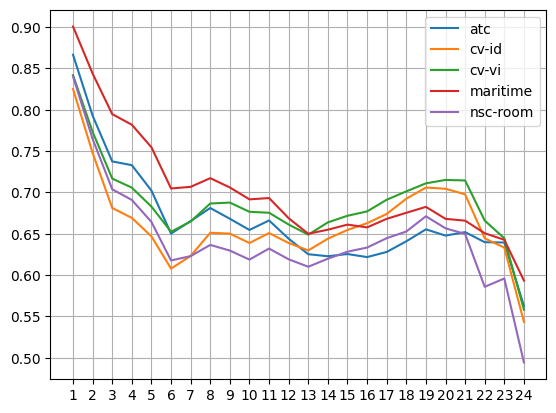

In [18]:
ax = df7.T.plot(grid=True)
ax.set_xticks(range(1,25))

plt.show()

In [19]:
df8 = get_avg_layer_metric(1, "f1_score", results)

df8
df8.style.highlight_max(color = 'pink', axis = 1)

,atc,cv-id,cv-vi,maritime,nsc-room
atc,0.866441,0.774206,0.778704,0.869626,0.767817
cv-id,0.775601,0.825006,0.838466,0.797629,0.834664
cv-vi,0.776838,0.829178,0.841704,0.797201,0.815472
maritime,0.868419,0.812500,0.825133,0.900576,0.793438
nsc-room,0.763065,0.792347,0.805914,0.768037,0.840280
